<a href="https://colab.research.google.com/github/Fellylove/Biotech/blob/master/copy_of_LS_DS_Unit_4_Sprint_Challenge_2_AG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Autograded Notebook (Canvas & CodeGrade)

This notebook will be automatically graded. It is designed to test your answers and award points for the correct answers. Following the instructions for each Task carefully.
Instructions

- **Download** this notebook as you would any other ipynb file 
- **Upload** to Google Colab or work locally (if you have that set-up)
- **Delete** `raise NotImplementedError()`

- **Write** your code in the `# YOUR CODE HERE` space


- **Execute** the Test cells that contain assert statements - these help you check your work (others contain hidden tests that will be checked when you submit through Canvas)

- **Save** your notebook when you are finished
- **Download** as a ipynb file (if working in Colab)
- **Upload** your complete notebook to Canvas (there will be additional instructions in Slack and/or Canvas)




## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron (i.e. Neural Network)
    - Analyze and Compare
4. [Keras MMP](#Q3)


____

# Before you submit your notebook you must first

1) Restart your notebook's Kernel

2) Run all cells sequentially, from top to bottom, so that cell numbers are sequential numbers (i.e. 1,2,3,4,5...)
- Easiest way to do this is to click on the **Cell** tab at the top of your notebook and select **Run All** from the drop down menu. 

____

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:** A neural is a container of a mathematical function which forms part of a network that is anologous to the biological neuron.

- **Input Layer:** The input layer in a neural network recieves the input information which is then processed through mathematical activation functions. 

- **Hidden Layer:** Hidden layers either recieve input from the input layer or from a previous layer. Each hidden layer has a mathematical function that processes the information.

- **Output Layer:** The outlayer receives input from previous layers process the informations through a mathematical functiona and outputs results. 

- **Activation:** This the process of transforming weighted sum of an input into an output. 

YOUR ANSWER HERE

- `Explain` how Back-propagation works 

- `Explain` how Gradient Descent works (mention the learning rate)


- `Explain` how Back-propagation and Gradient Descent are related   

Use your own words, but feel free to reference external materials for this question. 

YOUR ANSWER HERE


1.   Back-propagation computes the gradients of the loss function with respect to neural network parameters. It computes the gradients at the output layers and uses those gradients to compute the gradient at the previous layer and so on. And thus the weights are updated in reverse order at the end of each training epoch.

2. Gradient Descent is an optimal algorithm that minimizes the cost function or error by finding the local-global minimum of the function. The learning rate determines how quickly the model is updated when finding the minimum error path. 

3. Back-propagation monitors the error loss made during Gradient Descent. 



Remember our Simple Perceptron Class from Monday. 

- Describe the process of making a prediction, i.e. how do you go from inputs to outputs?

YOUR ANSWER HERE

Neural networks make predictions using the the forward feedback process. The goal of the feedback network is to approxiamte a certain mathematical function that maps an input to output and thus make a prediction. 

<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using `Keras`. After you build these two models, compare the results of the model.

In [1]:
"""
Our Dataset
"""
import numpy as np


rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

In [2]:
X.shape

(300, 2)

In [3]:
y

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [4]:
2**2

4

In [5]:
4**4

256

In [6]:
imput_dim = X[0].shape[0]
imput_dim

2

This word is speled wrong. 

### Simple Perceptron
Construct a simple perceptron using Keras. 

Make sure to include the following in your model:
- Add `1 dense layer` with a `single neuron` 
- Use a `sigmoid activation function`
- Set `epochs` to 10 
- Use the version of `crossentropy loss` that is appropriate for this data.

Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 


In [7]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# build and fit model
model1 = Sequential()

model1.add(Dense(1, input_dim= imput_dim, activation='sigmoid'))
model1.compile(loss='binary_crossentropy' ,
              optimizer='sgd' ,
              metrics=['accuracy'])
epochs = 10

h1 = model1.fit(X, y, 
                    epochs=epochs, 
                    validation_split=0.2
                   )



Epoch 1/10
8/8 [==============================] - 0s 23ms/step - loss: 0.7811 - accuracy: 0.4208 - val_loss: 0.7225 - val_accuracy: 0.4833
Epoch 2/10
8/8 [==============================] - 0s 4ms/step - loss: 0.7777 - accuracy: 0.4167 - val_loss: 0.7206 - val_accuracy: 0.4833
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 0.7742 - accuracy: 0.4208 - val_loss: 0.7189 - val_accuracy: 0.4833
Epoch 4/10
8/8 [==============================] - 0s 4ms/step - loss: 0.7709 - accuracy: 0.4208 - val_loss: 0.7173 - val_accuracy: 0.4833
Epoch 5/10
8/8 [==============================] - 0s 4ms/step - loss: 0.7677 - accuracy: 0.4208 - val_loss: 0.7158 - val_accuracy: 0.4833
Epoch 6/10
8/8 [==============================] - 0s 5ms/step - loss: 0.7645 - accuracy: 0.4208 - val_loss: 0.7143 - val_accuracy: 0.4833
Epoch 7/10
8/8 [==============================] - 0s 4ms/step - loss: 0.7616 - accuracy: 0.4167 - val_loss: 0.7128 - val_accuracy: 0.4833
Epoch 8/10
8/8 [=================

In [8]:
# Visible test
assert len(model1.get_config()["layers"]) == 2, "Make sure you only create 1 Dense layer."
assert len(h1.epoch) <=10, "Did you make sure to set epochs to 10 or less?"

In [9]:
model1.get_config()["layers"]

[{'class_name': 'InputLayer',
  'config': {'batch_input_shape': (None, 2),
   'dtype': 'float32',
   'name': 'dense_input',
   'ragged': False,
   'sparse': False}},
 {'class_name': 'Dense',
  'config': {'activation': 'sigmoid',
   'activity_regularizer': None,
   'batch_input_shape': (None, 2),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'dtype': 'float32',
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'GlorotUniform',
    'config': {'seed': None}},
   'kernel_regularizer': None,
   'name': 'dense',
   'trainable': True,
   'units': 1,
   'use_bias': True}}]

In [10]:
# Hidden tests - you will see the results when you submit to Canvas

### Multi-Layer Perceptron
Now construct a multi-layer perceptron model (also known as a neural network). 

Your neural network `must` have: 
- `2` Hidden Layers
- Select any number between `5-32` for the number of neurons in each hidden layers
- Your pick of activation function and optimizer
- Incorporate the `Callback function` below into your model
- Set epochs to `100`
- Your model should be called `model2` 
- Save the results of your fit statement to a variable called `h2`. 
- Use the version of `crossentropy loss` that is appropriate for this data.

In [11]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        # if model reaches 99% accuracy, training is terminated 
        acc_threshold = 0.99
        if(logs.get('accuracy') > acc_threshold):   
            self.model.stop_training = True
            self.model.callback_used = True

In [12]:
# build and fit model

model2 = Sequential()

model2.add(Dense(10, input_dim= imput_dim, activation='relu'))
model2.add(Dense(5, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy' ,
              optimizer='sgd' ,
              metrics=['accuracy'])
epochs = 100

h2 = model2.fit(X, y, 
                    epochs=epochs, 
                    validation_split=0.2,
                callbacks = [myCallback()]
                   )

Epoch 1/100
8/8 [==============================] - 1s 22ms/step - loss: 0.6864 - accuracy: 0.4333 - val_loss: 0.6789 - val_accuracy: 0.4500
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6851 - accuracy: 0.4375 - val_loss: 0.6781 - val_accuracy: 0.4500
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6837 - accuracy: 0.4375 - val_loss: 0.6772 - val_accuracy: 0.4500
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6823 - accuracy: 0.4500 - val_loss: 0.6765 - val_accuracy: 0.4500
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6811 - accuracy: 0.4458 - val_loss: 0.6758 - val_accuracy: 0.4667
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6799 - accuracy: 0.4500 - val_loss: 0.6751 - val_accuracy: 0.4667
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6787 - accuracy: 0.4542 - val_loss: 0.6744 - val_accuracy: 0.4500
Epoch 8/100
8/8 [=========

In [13]:
# Visible test
assert len(model2.get_config()["layers"]) == 4, "You should have 4 layers: Input, hidden 1, hidden 2, output."
assert 5 <= model2.get_config()["layers"][1]["config"]["units"] <= 32, "You should have 5 - 32 units in hidden layer 1, but don't."
assert 5 <= model2.get_config()["layers"][2]["config"]["units"] <= 32, "You should have 5 - 32 units in hidden layer 2, but don't."
assert h2.params["epochs"] == 100, "You didn't set epochs to 100."

In [14]:
# Hidden tests - you will see the results when you submit to Canvas

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. 

Install the package `mlxtend` into the environment you are using for the sprint challenge.

You can install this package using the following statement in the terminal

```python
pip install mlxtend
```

Or you can install this package using the following statement in your notebook

```python
!pip install mlxtend
```

If you choose to install this package from within your notebook, be sure to delete the install statement afterwards so that CodeGrade doesn't try to install it and potentially crash. 


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

In [15]:
!pip install mlxtend

In [16]:
X.shape, y.shape

((300, 2), (300,))

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


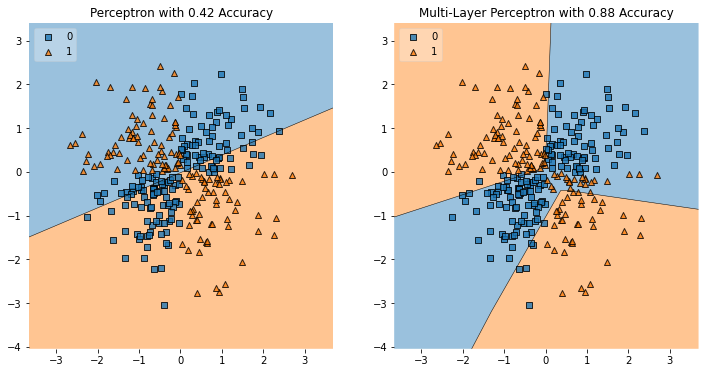

In [17]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


fig = plt.figure(figsize=(12,6))

for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

1) Why does the Perceptron (`model1`) only achieve about 50% accuracy? 

2) What is the architectural property of the Multi-Layer Perceptron that allows it to more accurately learn the relationship between X and y? 
- Hint: recall that each layer represents a vector space and they usually have a different number of dimensions, $\mathbb{R}^N$.
   

YOUR ANSWER HERE

1. The Perceptron model1 fails to achieve a higher accuracy because the single peceptron creates a simple neural network that doesn't have the complexity to learn the pattern between X and Y. It uses the linear function to solve the problem.
2. Multi-layer perceptron accurately learns the relationship between X and y becuase of its additional layers that can separate the data patterns with multiple lines that form different shapes. It solves the problem by incorporating non-linear functions.

## 3. Keras MMP <a id="Q3"></a>

- Implement a Multilayer Perceptron architecture of your choosing using the Keras library. 
- Train your model and report its baseline accuracy. 
- Then `hyper-parameters tune two parameters each with no more than 2 values each`
    - Due to limited computational resources on CodeGrade `DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE`
- Report your optimized model's accuracy
- Use the Heart Disease Dataset provided (binary classification)
- Use an appropriate loss function for a binary classification task
- Use an appropriate activation function on the final layer of your network.
- Train your model using verbose output for ease of grading.
- Use GridSearchCV to hyper-parameters tune your model. 
    - **Use `n_jobs` = 1**
- When hyper-parameters tuning, show you work by adding code cells for each new experiment.
- Report the accuracy for each combination of hyper-parameters as you test them so that we can easily see which resulted in the highest accuracy.

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# load data
data_path = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv'
df = pd.read_csv(data_path)
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
185,44,1,0,112,290,0,0,153,0,0.0,2,1,2,0
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3,0


In [19]:
# Create an input matrix named 'X' store it in a 2D numpy array

# Create an output vector for the labels named 'Y', store it in 1D numpy array



df1 = df[['age',	'sex',	'cp',	'trestbps',	'chol',	'fbs',	'restecg','thalach',	'exang',	'oldpeak',	'slope',	'ca',	'thal']]
X = df1.to_numpy()

Y = df['target'].to_numpy()

In [20]:
X.shape

(303, 13)

In [21]:
# Visible Testing
assert X.shape[0] == 303, "Did you drop/lose some rows in X? Did you properly load and split the data?"
assert X.shape[1] == 13, "Did you drop/lose some columns in X? Did you properly load and split the data?"
assert len(Y)== 303, "Did you drop/lose some rows in Y? Did you properly load and split the data?"

In [22]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [23]:
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [24]:
# Create a function named 'create_model' that returns a complied keras model -  required for KerasClassifier
# YOUR CODE HERE
def create_model(units=12):
    model = Sequential()
    model.add(Dense(units, activation='relu', input_dim=13))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [25]:
# Visible Testing
assert create_model().__module__ == 'tensorflow.python.keras.engine.sequential', "create_model should return a keras model that was created using the Sequential class."

In [26]:
# Pass 'create_model' into KerasClassifier, store KerasClassifier to a variable named 'model'
# YOUR CODE HERE
model = KerasClassifier(build_fn=create_model, verbose=1)

In [27]:
# Visible Testing
assert model.__module__ == 'tensorflow.python.keras.wrappers.scikit_learn', "model should be a instance of KerasClassifier."

In [28]:
# Define the grid search parameters inside a dictionary named 'param_grid' 
# Use 2 hyper-parameters with 2 possible values for each 

# YOUR CODE HERE
param_grid = {
    'units': [24, 36],
    'epochs': [30, 40],
}

In [29]:
assert len(param_grid.keys()) == 2, "Did you create a param dict with 2 hyper-parameters as keys?"

In [30]:
# Create Grid Search object and name it 'gs'
# Run Grid Search 
# YOUR CODE HERE
gs = GridSearchCV(model, param_grid, n_jobs=1)
grid_result = gs.fit(X_standardized, Y)

Epoch 1/30
8/8 [==============================] - 1s 2ms/step - loss: 0.7250 - accuracy: 0.4793
Epoch 2/30
8/8 [==============================] - 0s 3ms/step - loss: 0.6856 - accuracy: 0.5413
Epoch 3/30
8/8 [==============================] - 0s 2ms/step - loss: 0.6544 - accuracy: 0.5826
Epoch 4/30
8/8 [==============================] - 0s 2ms/step - loss: 0.6294 - accuracy: 0.6405
Epoch 5/30
8/8 [==============================] - 0s 2ms/step - loss: 0.6074 - accuracy: 0.6818
Epoch 6/30
8/8 [==============================] - 0s 2ms/step - loss: 0.5895 - accuracy: 0.7066
Epoch 7/30
8/8 [==============================] - 0s 3ms/step - loss: 0.5725 - accuracy: 0.7273
Epoch 8/30
8/8 [==============================] - 0s 2ms/step - loss: 0.5566 - accuracy: 0.7438
Epoch 9/30
8/8 [==============================] - 0s 3ms/step - loss: 0.5429 - accuracy: 0.7603
Epoch 10/30
8/8 [==============================] - 0s 2ms/step - loss: 0.5288 - accuracy: 0.7686
Epoch 11/30
8/8 [======================

In [31]:
# your grid_result object should be able to run in this code 
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.8315300583839417 using {'epochs': 30, 'units': 36}
Means: 0.8183060169219971, Stdev: 0.04644036905807477 with: {'epochs': 30, 'units': 24}
Means: 0.8315300583839417, Stdev: 0.05735455892564257 with: {'epochs': 30, 'units': 36}
Means: 0.8281420707702637, Stdev: 0.06599681460300777 with: {'epochs': 40, 'units': 24}
Means: 0.8183606624603271, Stdev: 0.08585851981890562 with: {'epochs': 40, 'units': 36}
